<a href="https://colab.research.google.com/github/alldominguez/isee_young_rennes_ws1/blob/main/ws1_isee_young_rennes_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://github.com/alldominguez/isee_young_rennes_ws1/blob/main/figures/logo_isse_young_rennes.PNG?raw=1" alt="ISGlobal logo" width="1000"/>  

# **Workshop 1: Statistical methods for studying mixtures and the exposome"**  

The study of mixtures and the exposome in the context of environmental epidemiological research is rapidly growing. Investigating mixtures and the exposome allows researchers to assess the independent and combined effects of various exposures, as well as their potential synergistic or antagonistic effects, on health outcomes. However, the complexity of exploring these questions requires the use of specific statistical models to account for aspects that single-exposure models cannot typically handle (e.g. multicollinearity).

This workshop therefore aims at summarizing and presenting the main models used for studying mixtures and the exposome, and discussing the pros and cons of each method in relation to a specific study objectives.




##**Introduction to the NoteBook** 📚

Within this **NoteBook**, you will be guided step by step from loading a dataset to running some mixture and exposome analysis.

The [Jupyter notebook](https://github.com/jupyter/notebook/tree/main) is an interactive computing environment that allows users to author notebook documents. Notebooks consist of **linear sequence of cells** that combines **code cells (input and output of live code that is run)**, and **markdown cells (narative text)**.

The components of the notebook are:

- **notebook web application:** an interactive web application for writing and running code interectively.
- **kernels**: separate processes started by the notebook application that run users' code in an specific language (Python, R, Julia, Ruby, Scala, etc).
- **notebook documents:** documents that contain a representation of all content visibile in the notebook web application.

## **Step-by-step** 👣

The order of the instructions is **essential**, so each cell in this notebook must be executed **sequentially**. If you omit any, you could have an error in your notebook, so you should start running cells from the beginning.

🔴 It is **very very important** that at the beginning you select **"*Open in test mode*" (draft mode)**, at the top left. Otherwise, it will not allow any block of code to be executed, for security reasons. When the first block is executed, the following message will appear: "**Warning: This notebook was not created by Google.**". Don't worry, you will have to trust the contents of the  (*NoteBook*) and click "Run anyway".

Click the "**run**" button on the left side of each code cell. Lines of code that begin with a **#** are comments and do not affect the execution of the code in the different chunks across the notebook.

## **INDEX**
1. [Installation of the R environment and libraries for analysis](#install-libraries)    
2. [Load data](#load-data)
3. [Exposome analysis](#exposome-analysis)    
4. [Mixture analysis](#mixture-analysis)

## **1. Installation of the R environment and libraries for analysis** <a name="install-libraries"></a>

* **Install R environment**

Installing R in our Google Colab environment will be done in the following code block. Remember that all library installations that we perform in the Google Colab environment will only remain active for a few hours, after which the installed libraries are deleted. Therefore, you will need to rerun the library installation codes in this section when you need to run notebook again after this time.

In [ ]:
# Check R version
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          4.0                         
year           2024                        
month          04                          
day            24                          
svn rev        86474                       
language       R                           
version.string R version 4.4.0 (2024-04-24)
nickname       Puppy Cup                   

* **Install/load libraries for the session**

We will install/load the necessary libraries for the practical session, for this we will use the `pacman` package, this package is an administration tool that combines functionalities of the `install.packages` + `library` functions.

In the context of exposome analysis, R libraries offer us a much more convenient way to process, manipulate and analyze data. Some of the  libraries that we will use in this session are: `rexposome`, `bkmr`, `gWQS`.

In [ ]:
# Execution time: 3 sec.
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Execution time: 23 min aprox.
pacman::p_load(Biobase, mice, MultiDataSet, lsr, FactoMiner,
               stingr, circlize, reshape2, pryr, scales, imputeLCMD,
               scatterplot3d, glmnet, gridExtra, grid, Hmisc, gplots,
               gtools, S4Vectors, tidyverse, corrplot, RColorBrewer,
               skimr, bkmr, gWQS, ggridges, MASS, caret, partDSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘Biobase’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Biobase’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’




In [ ]:
# Execution time: 12 min aprox
install.packages("devtools")
devtools::install_github("isglobal-brge/rexposome")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘downlit’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





stringi      (1.8.3  -> 1.8.4  ) [CRAN]
tidyselect   (1.2.0  -> 1.2.1  ) [CRAN]
pkgbuild     (1.4.3  -> 1.4.4  ) [CRAN]
fs           (1.6.3  -> 1.6.4  ) [CRAN]
processx     (3.8.3  -> 3.8.4  ) [CRAN]
digest       (0.6.34 -> 0.6.35 ) [CRAN]
callr        (3.7.3  -> 3.7.6  ) [CRAN]
brio         (1.1.4  -> 1.1.5  ) [CRAN]
bit          (4.0.4  -> 4.0.5  ) [CRAN]
testthat     (3.2.1  -> 3.2.1.1) [CRAN]
backports    (1.4.1  -> 1.5.0  ) [CRAN]
munsell      (0.5.0  -> 0.5.1  ) [CRAN]
farver       (2.1.1  -> 2.1.2  ) [CRAN]
isoband      (0.2.6  -> 0.2.7  ) [CRAN]
gtable       (0.3.4  -> 0.3.5  ) [CRAN]
xfun         (0.41   -> 0.44   ) [CRAN]
highr        (0.9    -> 0.11   ) [CRAN]
sass         (0.4.8  -> 0.4.9  ) [CRAN]
fastmap      (1.1.1  -> 1.2.0  ) [CRAN]
cachem       (1.0.8  -> 1.1.0  ) [CRAN]
tinytex      (0.49   -> 0.51   ) [CRAN]
knitr        (1.45   -> 1.46   ) [CRAN]
htmltools    (0.5.7  -> 0.5.8.1) [CRAN]
bslib        (0.6.1  -> 0.7.0  ) [CRAN]
ggplot2      (3.4.4  -> 3.5.1  ) [CRAN]


Installing 45 packages: stringi, tidyselect, pkgbuild, fs, processx, digest, callr, brio, bit, testthat, backports, munsell, farver, isoband, gtable, xfun, highr, sass, fastmap, cachem, tinytex, knitr, htmltools, bslib, ggplot2, rmarkdown, rstudioapi, BiocGenerics, Biobase, estimability, lazyeval, crosstalk, broom, data.table, impute, pcaMethods, multcompView, leaps, flashClust, emmeans, ellipse, DT, imputeLCMD, S4Vectors, FactoMineR

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpbJ76Bl/remotes1414c05d13d/isglobal-brge-rexposome-0bb431c/DESCRIPTION’ ... OK
* preparing ‘rexposome’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rexposome_1.21.1.tar.gz’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘rexposome/vignettes/rsconnect/documents/exposome_data_analysis.Rmd/rpubs.com/rpubs/Publish Document.dcf’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **2. Load the data** <a name="cargar-datos"></a>

Below are the **lines of code** required to **load** the Exposoma data set into the R environment. For this hands-on session we will use data from the HELIX exposome study. The HELIX study is a collaborative project between six population-based longitudinal birth cohort studies from six European countries (France, Greece, Lithuania, Norway, Spain and the United Kingdom).

<img src="https://github.com/alldominguez/isee_young_rennes_ws1/blob/main/figures/HELIX.png?raw=1" alt="HELIX logo" width="600"/>

**Note:** The data provided in this introductory course were simulated using data from the HELIX subcohort. Details of the HELIX project and the origin of the data collected can be consulted in the following publication: https://bmjopen.bmj.com/content/8/9/e021311 and website: https://www.projecthelix.eu/es .

* The **exposome data (n = 1301)** that we will use is contained in an Rdata file, the file contains the following files:

1. `phenotype` (outcomes)
2. `exposome`
3. `covariates` (covariates)


The `exposome` database contains more than **200 exposures**.

<img src="https://github.com/alldominguez/isee_young_rennes_ws1/blob/main/figures/HELIX_exposures.png?raw=1" alt="HELIX exposures" width="700"/>

The description of each variable (name, structure, variable type, transformation, ...) is detailed in the [codebook](https://github.com/alldominguez/isee_young_rennes/blob/main/data/codebook.csv).


* Load the neccesary data for the session

In [ ]:
# This RData file contains (phenotype, exposoe, covariates and codebook)
load(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.RData"))

In [ ]:
dplyr::glimpse(phenotype) # outcomes
dplyr::glimpse(exposome) # exposures
dplyr::glimpse(covariates) # covariates

Rows: 1,301
Columns: 7
$ ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ e3_bw            <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350, 3580, 3000,…
$ hs_asthma        <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,…
$ hs_zbmi_who      <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.04, -0.10, -1…
$ hs_correct_raven <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 18, 24, 30, 3…
$ hs_Gen_Tot       <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.0000, 4.0000, …
$ hs_bmi_c_cat     <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 4, 3, 2, 2,…
Rows: 1,301
Columns: 223
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16

In [ ]:
codebook

,variable_name,domain,family,subfamily,period,location,period_postnatal,description,var_type,transformation,labels,labelsshort
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
h_abs_ratio_preg_Log,h_abs_ratio_preg_Log,Outdoor exposures,Air Pollution,PMAbsorbance,Pregnancy,Home,NA,abs value (extrapolated back in time using ratio method)duringpregnancy,numeric,Natural Logarithm,PMabs,PMabs
h_no2_ratio_preg_Log,h_no2_ratio_preg_Log,Outdoor exposures,Air Pollution,NO2,Pregnancy,Home,NA,no2 value (extrapolated back in time using ratio method)during pregnancy,numeric,Natural Logarithm,NO2,NO2
h_pm10_ratio_preg_None,h_pm10_ratio_preg_None,Outdoor exposures,Air Pollution,PM10,Pregnancy,Home,NA,pm10 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM10,PM10
h_pm25_ratio_preg_None,h_pm25_ratio_preg_None,Outdoor exposures,Air Pollution,PM2.5,Pregnancy,Home,NA,pm25 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM2.5,PM2.5
hs_no2_dy_hs_h_Log,hs_no2_dy_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Day before examination,no2 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,Natural Logarithm,NO2(day),NO2(day)
hs_no2_wk_hs_h_Log,hs_no2_wk_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Week before examination,no2 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,Natural Logarithm,NO2(week),NO2(week)
hs_no2_yr_hs_h_Log,hs_no2_yr_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Year before examination,no2 value (extrapolated back in time using ratio method)one year before hs test at home,numeric,Natural Logarithm,NO2(year),NO2(year)
hs_pm10_dy_hs_h_None,hs_pm10_dy_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Day before examination,pm10 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,None,PM10(day),PM10(day)
hs_pm10_wk_hs_h_None,hs_pm10_wk_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Week before examination,pm10 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,None,PM10(week),PM10(week)


We are going to use the `rexposome::loadExposome` function to create a single dataset (`ExposomeSet`) through the `data.frames` that we initially loaded. First we will organize the data in the appropriate format for our analysis.

In [ ]:
# Time windows of exposure availables
levels(codebook$period)

[1] "Postnatal" "Pregnancy"

In [ ]:
# Exposure families availables for the analysis
levels(codebook$family)

[1] "Air Pollution"                             
 [2] "Built environment"                         
 [3] "Covariates"                                
 [4] "Indoor air"                                
 [5] "Lifestyle"                                 
 [6] "Metals"                                    
 [7] "Meteorological"                            
 [8] "Natural Spaces"                            
 [9] "Noise"                                     
[10] "Organochlorines"                           
[11] "Organophosphate pesticides"                
[12] "Per- and polyfluoroalkyl substances (PFAS)"
[13] "Phenols"                                   
[14] "Phenotype"                                 
[15] "Phthalates"                                
[16] "Polybrominated diphenyl ethers (PBDE)"     
[17] "Social and economic capital"               
[18] "Tobacco Smoke"                             
[19] "Traffic"                                   
[20] "Water DBPs"

* Processing data for the Exposome analysis

In [ ]:
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals") &
                                                  codebook$period == "Postnatal"]) # we can also select "Pregnancy" period
expo.list

[1] "hs_as_c_Log2"          "hs_cd_c_Log2"          "hs_co_c_Log2"         
 [4] "hs_cs_c_Log2"          "hs_cu_c_Log2"          "hs_hg_c_Log2"         
 [7] "hs_mn_c_Log2"          "hs_mo_c_Log2"          "hs_pb_c_Log2"         
[10] "hs_tl_cdich_None"      "hs_dde_cadj_Log2"      "hs_ddt_cadj_Log2"     
[13] "hs_hcb_cadj_Log2"      "hs_pcb118_cadj_Log2"   "hs_pcb138_cadj_Log2"  
[16] "hs_pcb153_cadj_Log2"   "hs_pcb170_cadj_Log2"   "hs_pcb180_cadj_Log2"  
[19] "hs_sumPCBs5_cadj_Log2"

In [ ]:
# We can exclude innecesary information
expo.list <- expo.list[-which(expo.list == "hs_tl_cdich_None")]
expo.list <- expo.list[-which(expo.list == "hs_sumPCBs5_cadj_Log2")]

In [ ]:
# Select specific columns (variables) from the families that we selected in the previous step and add the identifier per subject (ID)
expo2 <- exposome[ ,c("ID", expo.list)]

In [ ]:
# Now we scale the continous variables
index.cont <- c(3:9,11:ncol(expo2))
for (i in index.cont) {
  expo2[,i] <- expo2[,i]/IQR(expo2[,i],na.rm=T)
}

In [ ]:
# check the selected exposure variables
dplyr::glimpse(expo2)

Rows: 1,301
Columns: 18
$ ID                  <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ hs_as_c_Log2        <dbl> -4.28280856, -6.43028014, -7.97829150, 0.63226822,…
$ hs_cd_c_Log2        <dbl> -4.115508, -4.228603, -4.027235, -5.227292, -3.729…
$ hs_co_c_Log2        <dbl> 1.509089, -3.866323, -3.776703, -4.432068, -2.3824…
$ hs_cs_c_Log2        <dbl> 0.3342716, 0.2685689, 0.5188887, 0.8911191, 1.2028…
$ hs_cu_c_Log2        <dbl> 34.12738, 34.94684, 34.89511, 35.81951, 33.16411, …
$ hs_hg_c_Log2        <dbl> -1.049020025, -0.633919339, -0.443835176, 0.721573…
$ hs_mn_c_Log2        <dbl> 6.217601, 5.179186, 5.388626, 5.779506, 5.175665, …
$ hs_mo_c_Log2        <dbl> 1.2010916, 1.3552967, -0.6128079, -7.4270093, -0.3…
$ hs_pb_c_Log2        <dbl> 3.632268, 3.405992, 2.815575, 3.168321, 3.632268, …
$ hs_dde_cadj_Log2    <dbl> 3.561138, 2.365211, 3.061695, 2.307444, 1.988201, …
$ hs_ddt_cadj_Log2    <dbl> 0.11790564, 0.30482029, 0.57680451, 0.60544700, -0…
$ hs_hcb_cadj_Lo

In [ ]:
codebook[expo.list,]$labels

[1] As      Cd      Co      Cs      Cu      Hg      Mn      Mo      Pb     
[10] DDE     DDT     HCB     PCB 118 PCB 138 PCB 153 PCB 170 PCB 180
178 Levels: Access_ lines Access_ lines_home ... Yogurt

* We combine data from the `phenotype` and `covariates` files

In [ ]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # we select the 4th column of the phenotype dataframe and call it hs_zbmi_who
             covariates[ ,2:13])  # we select from columns 2 to 13 of the covariates dataframe

data <- data.frame(expo2, dat)

In [ ]:
str(data)

'data.frame':	1301 obs. of  46 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hs_accesslines300_h_dic0  : num  0 0 0 1 1 0 0 0 0 0 ...
 $ hs_accesspoints300_h_Log  : num  1.041 1.724 0.359 2.848 2.25 ...
 $ hs_builtdens300_h_Sqrt    : num  2.56 2.41 2.36 3.02 1.32 ...
 $ hs_connind300_h_Log       : num  4.76 3.92 3 5.71 5.03 ...
 $ hs_fdensity300_h_Log      : num  4.94 4.94 4.94 6.72 5.27 ...
 $ hs_landuseshan300_h_None  : num  1.97 1.79 2.68 2.54 2.85 ...
 $ hs_popdens_h_Sqrt         : num  1.547 0.186 0.186 1.211 0.083 ...
 $ hs_walkability_mean_h_None: num  3.75 2 2.5 5.25 3 3.75 3 3.25 2.75 5.25 ...
 $ hs_accesslines300_s_dic0  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ hs_accesspoints300_s_Log  : num  0.359 1.358 1.358 2.041 1.358 ...
 $ hs_builtdens300_s_Sqrt    : num  2.322 2.314 2.21 2.451 0.373 ...
 $ hs_connind300_s_Log       : num  2.83 4.15 4.76 6.76 5.66 ...
 $ hs_fdensity300_s_Log      : num  4.46 4.46 4.46 5.36 4.76 ...
 $ hs_landuseshan300_s_None  : n

Now we will create our `ExposomeSet` object by combining our three files that we worked on in the previous lines. We need to create this specific object to use some of the functionalities of the `rexposome` package.

This dataset is composed of:

* **3 families of exposures** (built environment, metals, organochlorines), there are **32 exposures in total**. (continuous variables)
* **1 outcome** (z-score for BMI) (continuous variable)
* **1 exposure window** (postnatal period)

In [ ]:
exp <- rexposome::loadExposome(exposures = expo2[expo.list],
                               description = codebook[expo.list,],
                               phenotype = dat,
                               description.famCol = "family")

We will also create a dataset (containing the same data) but joining the `phenotype`, `exposome`, `covariates` files. This dataframe will be more easy to handle it outside the functionalities of `rexposome` package.

In [ ]:
exp_all <- phenotype %>%
           dplyr::inner_join(exposome, by = "ID") %>%
           dplyr::inner_join(covariates, by = "ID")

In [ ]:
dplyr::glimpse(exp_all)

Rows: 1,301
Columns: 242
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ e3_bw                        <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350,…
$ hs_asthma                    <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,…
$ hs_zbmi_who                  <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.0…
$ hs_correct_raven             <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 1…
$ hs_Gen_Tot                   <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.00…
$ hs_bmi_c_cat                 <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2,…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_

## **3. Exposome analysis** <a name="exposome-analysis"></a>


<img src="https://github.com/alldominguez/isee_young_rennes_ws1/blob/main/figures/Exposome.jpg?raw=1" alt="ISGlobal logo" width="500"/>  

The exposome, described as 'the totality of human environmental exposures from conception onwards,'acknowledges that individuals are simultaneously exposed to multiple different environmental factors, adopting a holistic approach to discovering etiological factors of disease. The main advantage of the exposome approach over more traditional 'one exposure, one disease or health outcome' models is that it provides a framework for studying multiple environmental risks (urban, chemical, lifestyle, social, etc.) and their combined effects.





### **3.1 Descriptive exposome anaylsis** <a name="descriptive-exposome"></a>

- Firstly, we will check the **levels** of some pollutants of interest **(Organoclorines, air pollutants, metals)**

In [ ]:
# This line is just to set the size of the following plots
options(repr.plot.width = 10, repr.plot.height = 10)

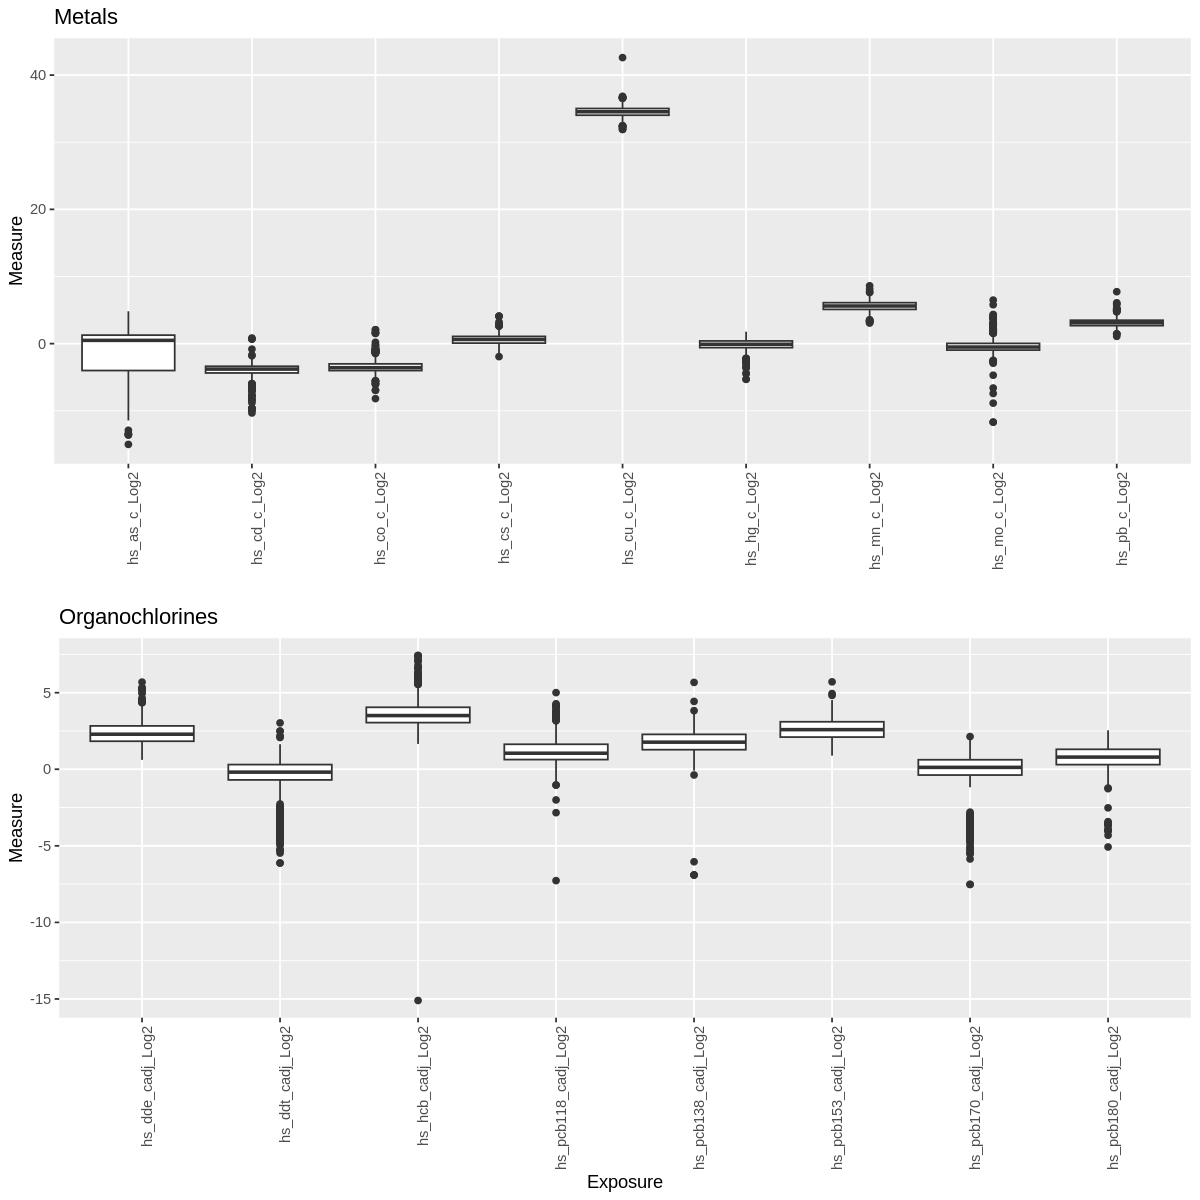

In [ ]:
# We plot the concentrations of each pollutant per family
rexposome::plotFamily(exp, family = "all")

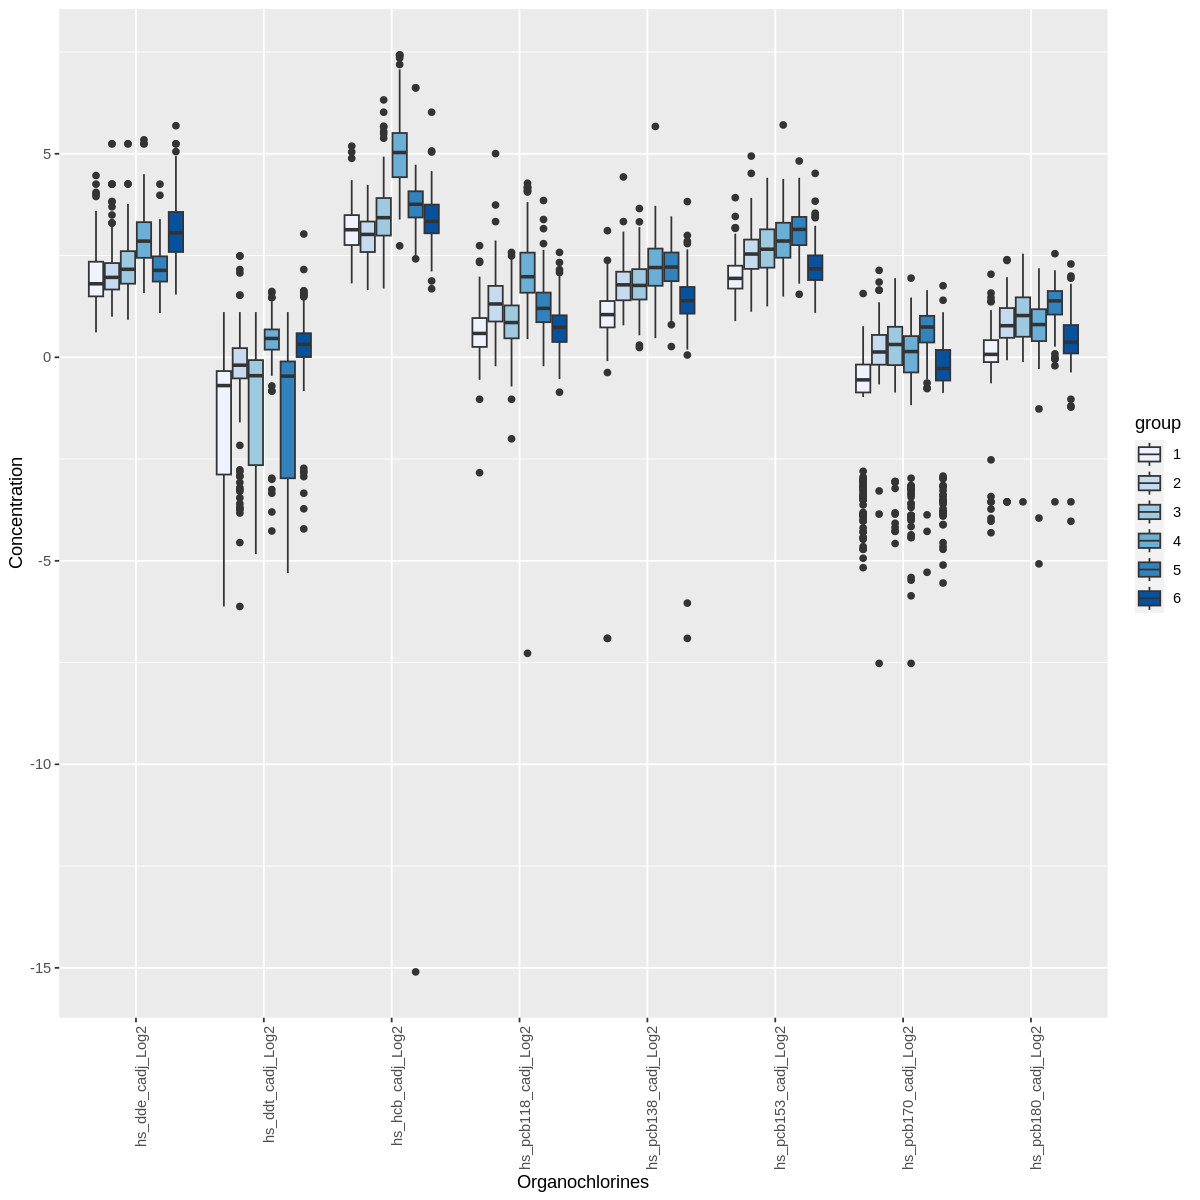

In [ ]:
# Organoclorines levels per cohort
rexposome::plotFamily(exp,
                      family = "Organochlorines",
                      group = "h_cohort") +
                      xlab('Organochlorines') +
                      ylab('Concentration')

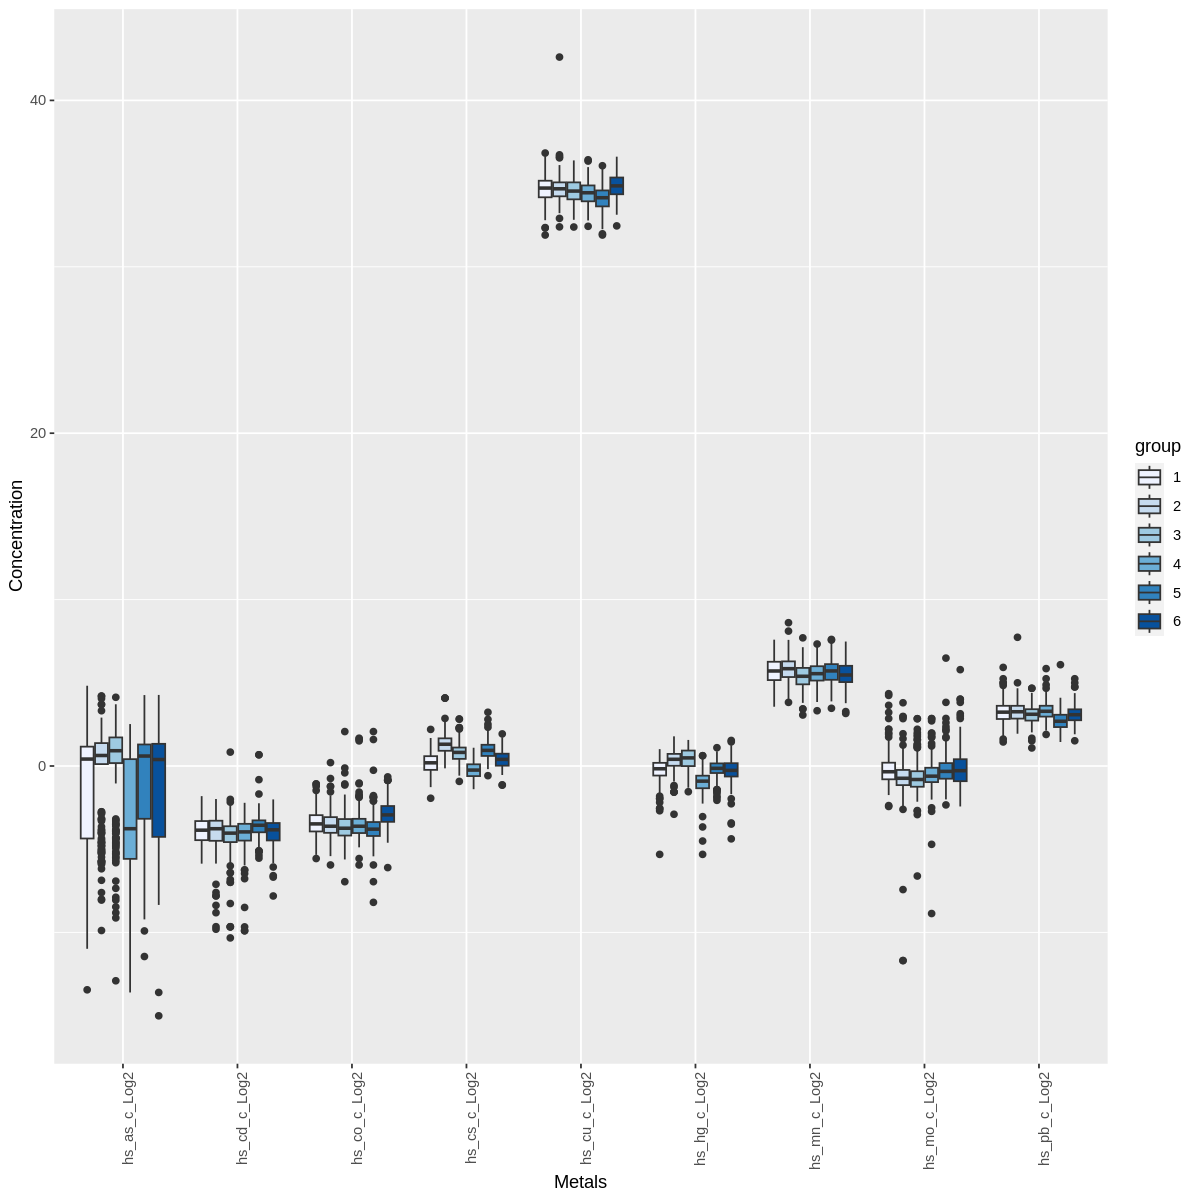

In [ ]:
# Metals levels per sex
rexposome::plotFamily(exp,
                      family = "Metals",
                      group = "h_cohort") +
                      xlab('Metals') +
                      ylab('Concentration')

- Secondly, we will check the correlation between families **(Organochlorines, air pollution, metals)**

In [ ]:
exp_cor <- rexposome::correlation(exp, use = "pairwise.complete.obs", method.cor = "spearman")
exp_cor

Object of class 'Exposome Correlation' (storageMode: environment)
 . assayData: 17 x 17 exposure-correlations
    . element names: corr 
    . exposures: hs_as_c_Log2, ..., hs_pcb170_cadj_Log2 
 . featureData: 17 exposures 17 explanations
    . exposures: hs_as_c_Log2, ..., hs_pcb170_cadj_Log2 
    . descriptions: Family, ..., .imp 

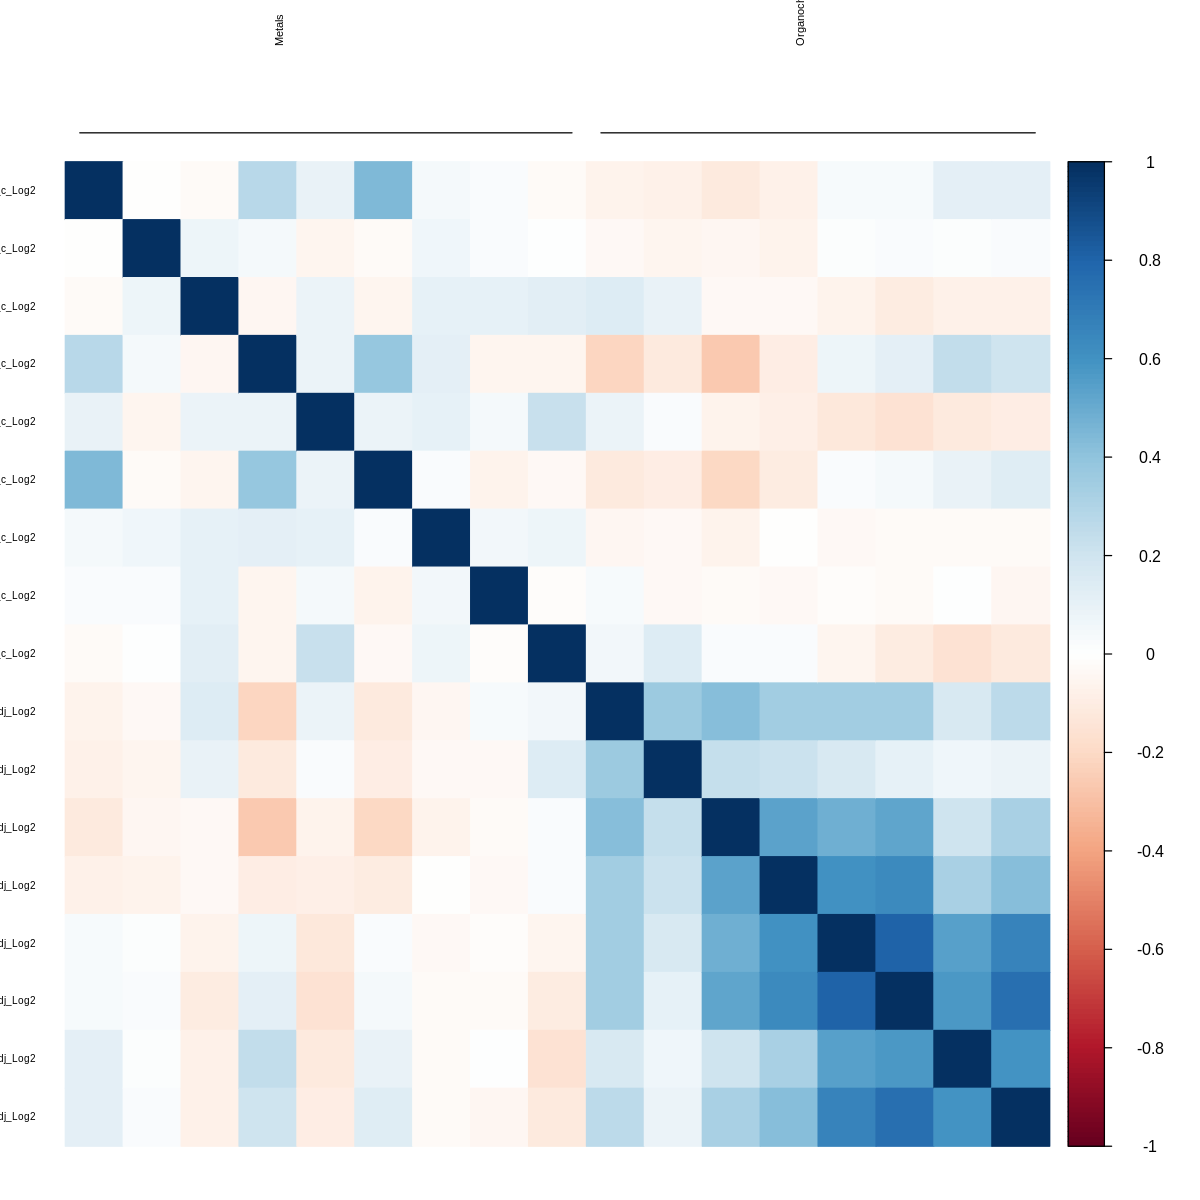

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
rexposome::plotCorrelation(exp_cor, type = "matrix")

### **3.2 Exposome association analysis** <a name="association"></a>

Once the exposome variables that we want to study have been explored and described, we can look at the association between some health outcome and the different exposures using different approaches such as those mentioned in the theoretical part.

- **Exposome-Wide association analysis (ExWAS)**

The ExWAS method is an approach that allows us to deal with high-dimensionality data. This method tests the association of each of the exposures with the health outcome of interest, adjusting for confounding variables (but not for co-exposures), additionally allowing us to control for multiple testing. This method can be applied through the `rexposome::exwas` function.

In [ ]:
exwas <- rexposome::exwas(exp, formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None, family = "gaussian")
exwas

An object of class 'ExWAS'

       ~ hs_zbmi_who h_cohort + e3_sex_None + e3_yearbir_None 

Tested exposures:  17 
Threshold for effective tests (TEF):  4.25e-03 
 . Tests < TEF: 0 
Robust standar errors: Computed

In [ ]:
# We obtain the threshold for the effective number of testing (multiple testing): corrected p-value
rexposome::tef(exwas)

[1] 0.004250246

In [ ]:
exwas_result <- round(as.data.frame(rexposome::extract(exwas)),6)
View(exwas_result)

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_cu_c_Log2,0.000007,0.182805,0.103212,0.262398
hs_mo_c_Log2,0.000018,-0.125084,-0.182066,-0.068102


Using the `rexposome::plotExwas` function we can visualize the exwas results using a Manhattan plot. This type of graph is particularly useful since it allows us to visualize the statistical association through the p-value grouped by the different exposure families. It is important to mention that the Manhattan plot only shows us the p-values, but no metric of the effect of the exposures is taught.

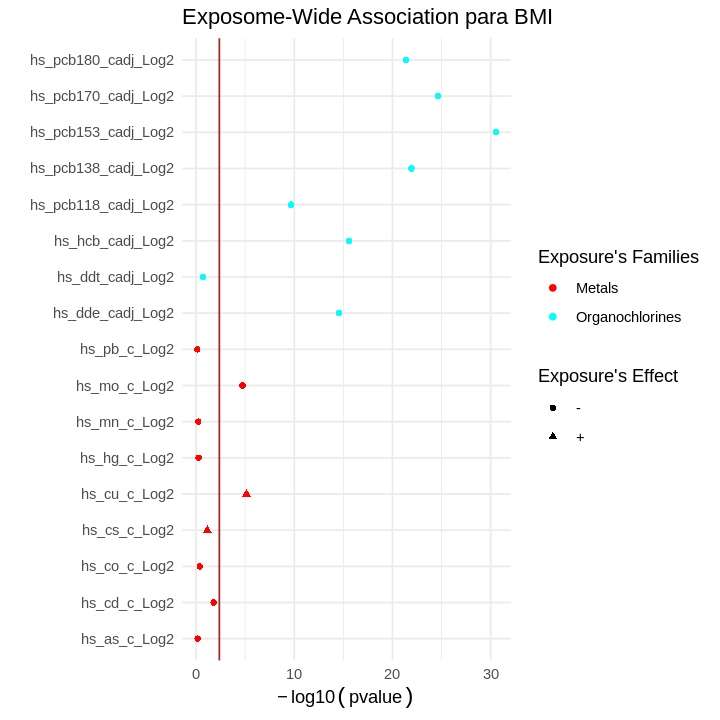

In [ ]:
clr <- rainbow(length(rexposome::familyNames(exp)))
names(clr) <- rexposome::familyNames(exp)

options(repr.plot.width = 6, repr.plot.height = 6)

rexposome::plotExwas(exwas, color = clr, show.effective = TRUE,
          exp.order=expo.list) +
  ggtitle("Exposome-Wide Association para BMI")

* **Question 1:** <font color='green'> **Is ExWas analysis controlled by multiple testing?** </font>
* **Question 2:** <font color='green'> **If any participant is exposed to PCB153, can we say that if they are also exposed to PCB118 their BMI will be reduced?** </font>


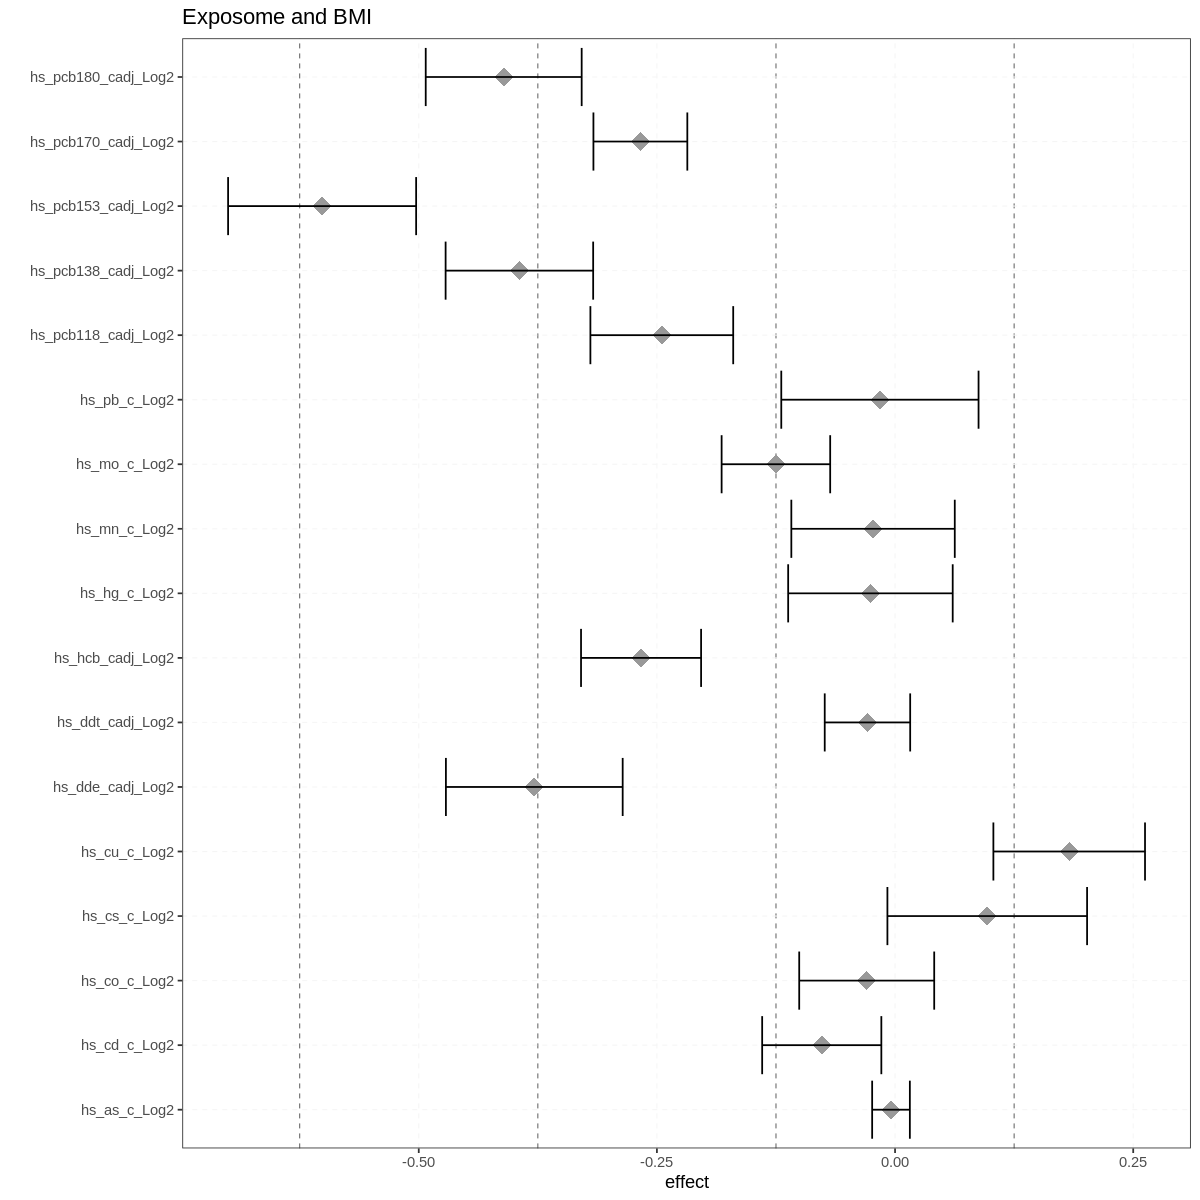

In [ ]:
rexposome::plotEffect(exwas) + ggtitle("Exposome and BMI")

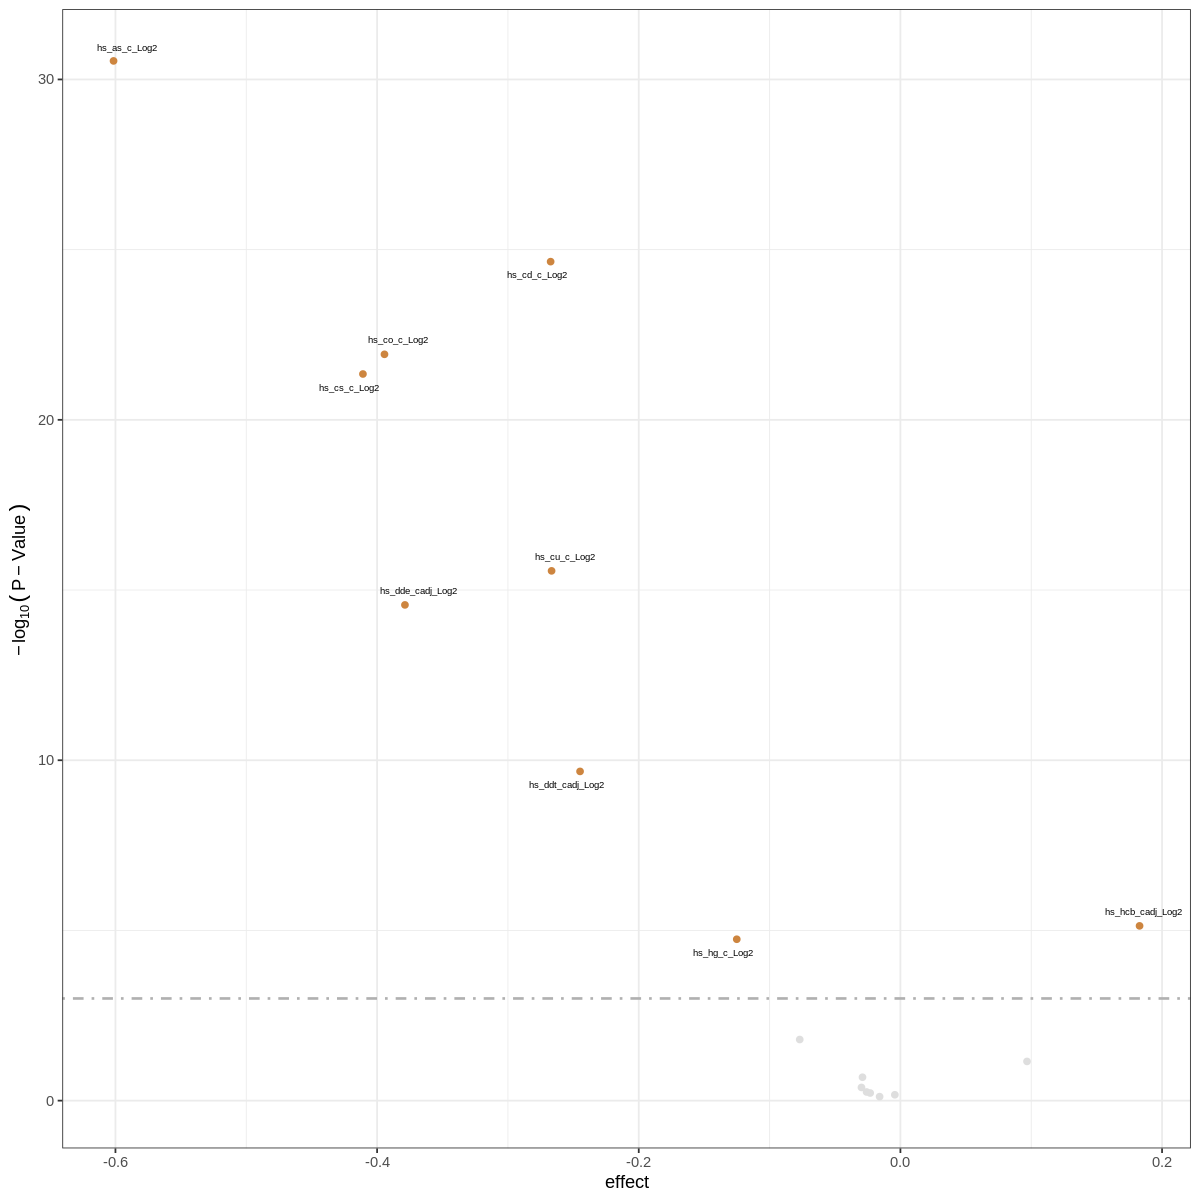

In [ ]:
rexposome::plotVolcano(exwas)

* **Stepwise selection**

This technique uses a sequence of steps to allow predictor variables to enter or exit a regression model one by one (generates multiple models). Often this procedure converges on a subset of variables. The entry and exit criteria are based on the significance of the p-value. The importance of features is ranked according to their individual ability to explain variation in the outcome.

In [ ]:
set.seed(234) #definimos una semilla
full.model <- lm(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                   hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                   hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                   hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                   hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                   hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                   hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                   hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                   hs_popdens_s_Sqrt + hs_as_c_Log2 +
                   hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                   hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                   hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                   hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                   hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                   hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                   hs_pcb180_cadj_Log2,
                 data = data)

In [ ]:
step.model <- stepAIC(full.model, direction = "both",
                      trace = FALSE,
                      scope = list(lower = ~ h_cohort + e3_sex_None + e3_yearbir_None))

In [ ]:
# revisamos los resultados al aplicar el modelo de stepwise
summary(step.model)

* **Elastic net**

This technique is based on the combination of the LASSO and Ridge penalties, with the aim of overcoming some of their limitations. Because in the presence of correlated variables LASSO tends to select one variable from a group and ignore the rest and Ridge selects some variables with similar magnitudes, a good compromise is achieved by using Elastic net. The penalty parameters are optimized through the cross-validation procedure (which can generate problems of instability in the results)

In [ ]:
# Definimos las variables predictoras del modelo (basicamente todas las exposiciones y covariables)
x <- model.matrix(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                    hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                    hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                    hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                    hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                    hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                    hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                    hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                    hs_popdens_s_Sqrt + hs_as_c_Log2 +
                    hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                    hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                    hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                    hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                    hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                    hs_pcb180_cadj_Log2, data)[,-1]

In [ ]:
pen.fac <- c(rep(0,12),rep(1,ncol(x)-12))

In [ ]:
set.seed(123)
model <- train(x=x, y=data$hs_zbmi_who,
  method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10, penalty.factor=pen.fac
)


In [ ]:
# Best tuning parameter
model$bestTune

# Coefficient of the final model. You need
# to specify the best lambda
coef(model$finalModel, model$bestTune$lambda)

Variables that have a **dot (.)** instead of a coefficient have been excluded by the method; These coefficients have been reduced to zero and are not part of the final model. This indicates that, according to the model, they do not provide information that significantly improves the prediction capacity of the model given the current regularization parameters and the information contained in the other variables.

## **Mixture analysis**

The main idea in mixture analysis is that low levels of exposure to a given contaminant may produce no health effects (or effects that are too small to be detected), but combined exposure to multiple contaminants can generate an effect.

<img src="https://github.com/alldominguez/isee_young_rennes_ws1/blob/main/figures/PRIME.png?raw=1" alt="ISGlobal logo" width="500"/>  

Approaches used in environmental epidemiology fail to capture the complexity when evaluating the combined effect of multiple exposures due to some limitations:

- They will not evaluate the joint effect of multiple exposures.
- The interaction between different exposures is not considered.

Therefore, other methods are needed to investigate the health effects of mixtures or multiple exposures. In recent years, various methods have been proposed to estimate the independent and joint effects of multiple exposures.

The selection of the **correct method** in **mixture analysis** should be guided by the **research question we want to answer**.
